<a href="https://colab.research.google.com/github/sharifulla01/Early-Diabetes-Prediction-/blob/main/Early_Diabetic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import shap
shap.initjs()

In [82]:
from sklearn.metrics import roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [84]:
df  = pd.read_csv('/content/diabetes_data.csv')
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [85]:
df.describe()

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:


dummies = pd.get_dummies(df['gender'], drop_first = True)

df = df.drop('gender', axis = 1)

df = pd.concat([df, dummies], axis = 1)
df = df.rename(columns = {'Male' : 'gender'})
df.head()

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class,gender
0,40,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,True
1,58,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,True
2,41,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,True
3,45,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,True
4,60,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,True


In [87]:
df.corr()

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class,gender
age,1.000000,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679,0.062872
polyuria,0.199781,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922,-0.268894
polydipsia,0.137382,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734,-0.312262
sudden_weight_loss,0.064808,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568,-0.281840
weakness,0.224596,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275,-0.124490
polyphagia,0.315577,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504,-0.219968
genital_thrush,0.096519,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288,0.208961
visual_blurring,0.402729,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300,-0.208092
itching,0.296559,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384,-0.052496
irritability,0.201625,0.237740,0.203446,0.140340,0.146698,0.239466,0.160551,0.077095,0.114006,1.000000,0.126877,0.151571,0.201637,0.043708,0.127801,0.299467,-0.013735


<ipython-input-88-704d3a6aaa49>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette=colors)


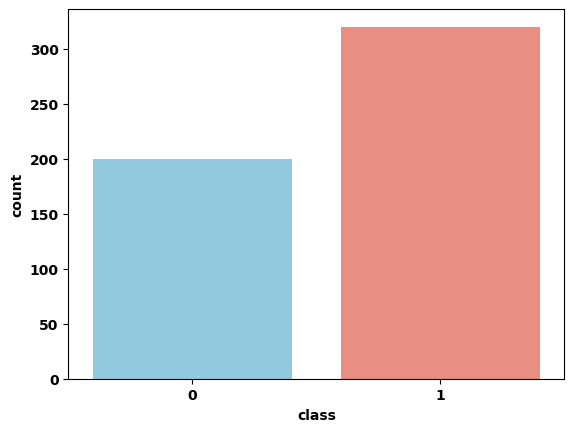

In [88]:

# Define colors for the two bars
colors = ["skyblue", "salmon"]

sns.countplot(x='class', data=df, palette=colors)
plt.xlabel('class', fontweight='bold')
plt.ylabel('count', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()


# EDA

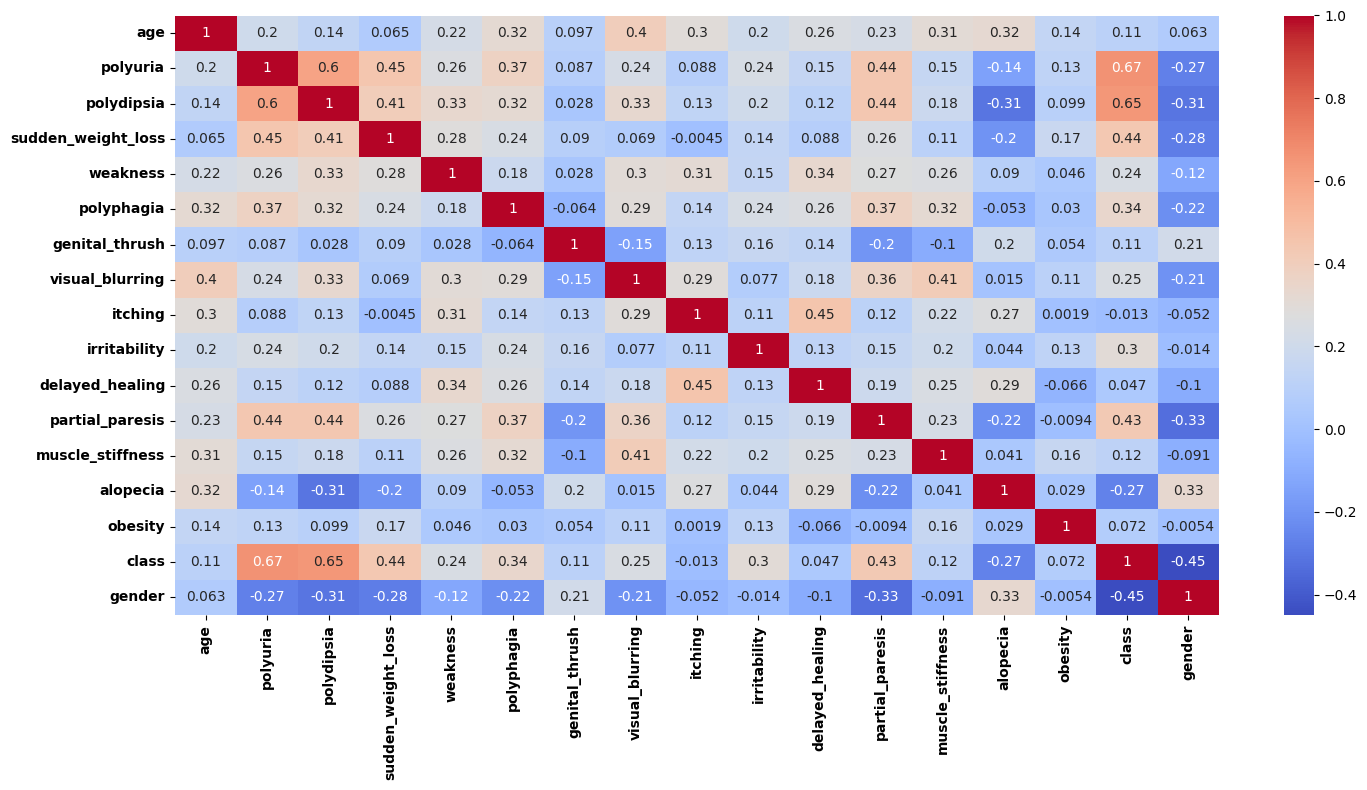

In [89]:
plt.figure(figsize=(15, 8))
ax = sns.heatmap(data=df.corr(), cmap='coolwarm', annot=True)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.tight_layout()
plt.show()


# Blanced imblanced dataset using SMOTE

In [90]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [91]:
X=df.drop('class',axis=1)
X.head()
y = df['class']

In [92]:
sm = SMOTE(random_state = 42)

In [93]:
x_res, y_res = sm.fit_resample(X, y)

In [94]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({1: 320, 0: 200})
Resampled dataset shape Counter({1: 320, 0: 320})


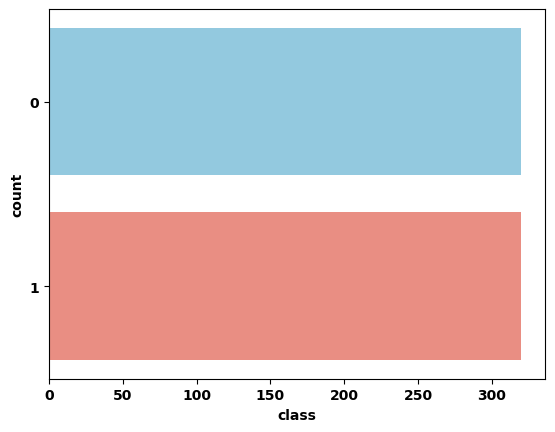

In [95]:
sns.countplot(y=y_res, hue=y_res, palette=colors, legend=False)
plt.xlabel('class', fontweight='bold')
plt.ylabel('count', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()


In [96]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0])

In [98]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9358974358974359

In [99]:
from sklearn.ensemble import RandomForestClassifier
rfcr = RandomForestClassifier(n_estimators = 200)

In [100]:
rfcr.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [101]:
pred = rfcr.predict(X_test)

In [102]:
accuracy = accuracy_score(pred, y_test)
accuracy

0.9935897435897436

# Decision Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier
d_pred = DecisionTreeClassifier(max_depth=500, random_state=40)
d_pred.fit(X_train, y_train)
de_pred = d_pred.predict(X_test)
accuracy = accuracy_score(de_pred, y_test)
accuracy


0.967948717948718

In [104]:
class DTree:
    def __init__(self):
        pass

    def getResults(self):
        d_pred.fit(X_train, y_train)
        de_pred = d_pred.predict(X_test)
        accuracy = accuracy_score(de_pred, y_test)
        print(accuracy)
        return d_pred, de_pred, accuracy



def main():
    decision_tree = DTree()


if __name__=='__main__':
	main()


In [105]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

In [106]:
class kneighbor:
    def __init__(self):
        pass

    def getResults(self):
        neigh.fit(X_train, y_train)
        pred_neigh = neigh.predict(X_test)
        accuracy = accuracy_score(pred_neigh, y_test)
        print(accuracy)
        return neigh, pred_neigh, accuracy


def main():
    neighb = kneighbor()


if __name__=='__main__':
	main()


In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class LogReg:
    def __init__(self):
        pass

    def getResults(self):
        # Assuming X_train, X_test, y_train, y_tst are defined elsewhere
        logreg=LogisticRegression(random_state=0,max_iter=150)
        logreg.fit(X_train, y_train)
        pred_logreg = logreg.predict(X_test)
        accuracy = accuracy_score(pred_logreg, y_test)
        print(accuracy)
        return logreg, pred_logreg, accuracy

    def getCoefficients(self):
        return self.getResults()[0].coef_

def main():
    logreg = LogReg()
    coef = logreg.getCoefficients()
    coef = coef.flatten()
    print(coef)

if __name__=='__main__':
    main()


0.9358974358974359
[-0.02861462  2.46320192  2.56008278  0.91654103  0.4950914   0.31560369
  1.20353677  0.67231694 -1.23683286  1.31339714 -0.46894222  1.01426297
 -0.2616376  -0.0912661  -0.16873854 -2.26404154]


In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

# Evaluation metrics for KNN
print("K-Nearest Neighbors Accuracy score: %.3f" % accuracy_score(y_test, y_pred_knn))
print("K-Nearest Neighbors Precision score: %.3f" % precision_score(y_test, y_pred_knn, average='macro'))
print("K-Nearest Neighbors Recall score: %.3f" % recall_score(y_test, y_pred_knn, average='macro'))
print("K-Nearest Neighbors F1 score: %.3f" % f1_score(y_test, y_pred_knn, average='macro'))

K-Nearest Neighbors Accuracy score: 0.872
K-Nearest Neighbors Precision score: 0.857
K-Nearest Neighbors Recall score: 0.885
K-Nearest Neighbors F1 score: 0.865


In [109]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

base_estimator = DecisionTreeClassifier(max_depth=100)

adaboost_model = AdaBoostClassifier( n_estimators=10)


adaboost_model.fit(X_train, y_train)

y_pred_adaboost = adaboost_model.predict(X_test)

print("Adaboost Accuracy score: %.3f" % accuracy_score(y_test, y_pred_adaboost))
print("Adaboost Precision score: %.3f" % precision_score(y_test, y_pred_adaboost, average='macro'))
print("Adaboost Recall score: %.3f" % recall_score(y_test, y_pred_adaboost, average='macro'))
print("Adaboost F1 score: %.3f" % f1_score(y_test, y_pred_adaboost, average='macro'))

Adaboost Accuracy score: 0.917
Adaboost Precision score: 0.909
Adaboost Recall score: 0.906
Adaboost F1 score: 0.908


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [110]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_xgb = XGBClassifier(n_estimators=100, learning_rate=0.2, random_state=10,max_delta_step=200)
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb, average='macro')
recall = recall_score(y_test, y_pred_xgb, average='macro')
f1 = f1_score(y_test, y_pred_xgb, average='macro')

print("XGBoost Model:")
print("Accuracy: %.3f" % accuracy)
print("Precision: %.3f" % precision)
print("Recall: %.3f" % recall)
print("F1 Score: %.3f" % f1)

XGBoost Model:
Accuracy: 0.987
Precision: 0.982
Recall: 0.990
F1 Score: 0.986


In [111]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
model_dt = DecisionTreeClassifier(random_state=42)

# Train the model
model_dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = model_dt.predict(X_test)

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='macro')
recall_dt = recall_score(y_test, y_pred_dt, average='macro')
f1_dt = f1_score(y_test, y_pred_dt, average='macro')

# Print the evaluation metrics
print("Decision Tree Model:")
print("Accuracy: %.3f" % accuracy_dt)
print("Precision: %.3f" % precision_dt)
print("Recall: %.3f" % recall_dt)
print("F1 Score: %.3f" % f1_dt)

# Calculate ROC score
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, model_dt.predict_proba(X_test)[:,1])
roc_score_dt = max(tpr_dt - fpr_dt)

# Print the ROC score
print("ROC Score:", roc_score_dt)


Decision Tree Model:
Accuracy: 0.949
Precision: 0.938
Recall: 0.952
F1 Score: 0.944
ROC Score: 0.9041394335511983


In [112]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
model_rf = RandomForestClassifier(random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

# Print the evaluation metrics
print("Random Forest Model:")
print("Accuracy: %.3f" % accuracy_rf)
print("Precision: %.3f" % precision_rf)
print("Recall: %.3f" % recall_rf)
print("F1 Score: %.3f" % f1_rf)

# Calculate ROC score
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, model_rf.predict_proba(X_test)[:,1])
roc_score_rf = max(tpr_rf - fpr_rf)

# Print the ROC score
print("ROC Score:", roc_score_rf)


Random Forest Model:
Accuracy: 0.994
Precision: 0.991
Recall: 0.995
F1 Score: 0.993
ROC Score: 1.0


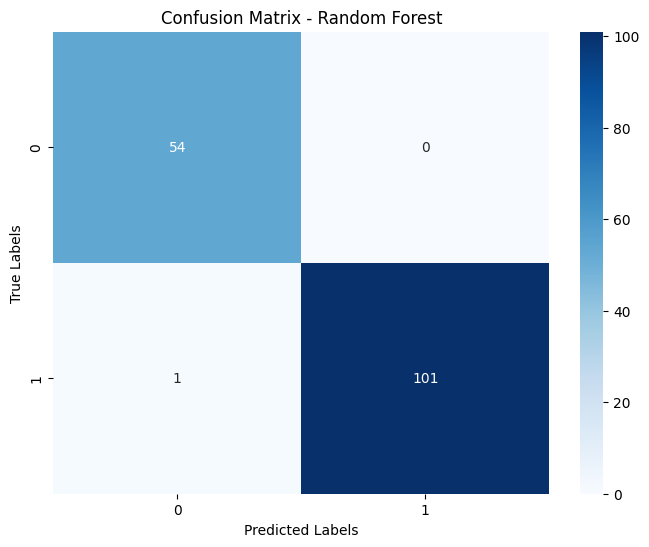

In [113]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, cmap="Blues", fmt='g')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
